#Deskripsi Proyek

Pada proyek ini, sebuah perusahaan di industri perfilman berupaya meningkatkan penggunaan platform streaming film mereka. Untuk mencapai tujuan ini, perusahaan berencana menggunakan pendekatan Machine Learning guna merekomendasikan film berdasarkan genre yang tersedia.

#1 Import Library yang Dibutuhkan

In [ ]:
# Install public API Kaggle
!pip install -q kaggle

In [ ]:
# Install library untuk proses data loading dan visualisasi data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity


#2 Data Understanding

Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut.

##2.1 Data Loading

Data Loading merupakan tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami.

Dataset yang digunakan pada proyek ini:
https://www.kaggle.com/datasets/gargmanas/movierecommenderdataset

In [ ]:
# Membuat direktori baru bernama kaggle
!rm -rf ~/.kaggle && mkdir ~/.kaggle/

# Menyalin berkas kaggle.json pada direktori aktif saat ini ke direktori kaggle
!mv kaggle.json ~/.kaggle/kaggle.json

# Mengubah permission berkas
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d gargmanas/movierecommenderdataset

# Ekstrak berkas zip
!unzip /content/movierecommenderdataset.zip

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/gargmanas/movierecommenderdataset
License(s): GPL-2.0
  0% 0.00/846k [00:00<?, ?B/s]
100% 846k/846k [00:00<00:00, 124MB/s]
Archive:  /content/movierecommenderdataset.zip
  inflating: movies.csv              
  inflating: ratings.csv             


In [ ]:
# Melihat isi dataset movies.csv
movies = pd.read_csv('/content/movies.csv')
values = ['Comedy','Action','Adventure','Documentary','Horror','Crime','Drama','Romance','Thriller','Mystery', 'Animation', 'Fantasy']
movies = movies[movies.genres.isin(values) == True]

movies

,movieId,title,genres
4,5,Father of the Bride Part II (1995),Comedy
8,9,Sudden Death (1995),Action
13,14,Nixon (1995),Drama
17,18,Four Rooms (1995),Comedy
18,19,Ace Ventura: When Nature Calls (1995),Comedy
...,...,...,...
9730,190221,Hommage à Zgougou (et salut à Sabine Mamou) (2...,Documentary
9735,193573,Love Live! The School Idol Movie (2015),Animation
9736,193579,Jon Stewart Has Left the Building (2015),Documentary
9739,193585,Flint (2017),Drama


In [ ]:
# Melihat isi dataset ratings.csv
rating = pd.read_csv('/content/ratings.csv')
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


##2.2 Exploratory Data Analysis (EDA)

Exploratory data analysis merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data

###2.2.1 EDA - Deskripsi Variabel

In [ ]:
# Melihat informasi pada dataset movies
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2731 entries, 4 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  2731 non-null   int64 
 1   title    2731 non-null   object
 2   genres   2731 non-null   object
dtypes: int64(1), object(2)
memory usage: 85.3+ KB


In [ ]:
# Melihat informasi pada dataset rating
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


###2.2.2 EDA - Univariate Analysis

###- Movies

In [ ]:
# Melihat jumlah film dan jumlah genre yang ada beserta nama genrenya
print('Jumlah Film: ', len(movies.movieId.unique()))
print('Jumlah genre: ', len(movies.genres.unique()))
print('Genre: ', movies.genres.unique())

Jumlah Film:  2731
Jumlah genre:  12
Genre:  ['Comedy' 'Action' 'Drama' 'Documentary' 'Thriller' 'Horror' 'Romance'
 'Adventure' 'Crime' 'Mystery' 'Fantasy' 'Animation']


             jumlah film  persentase
genres                              
Drama               1053        38.6
Comedy               946        34.6
Documentary          339        12.4
Horror               167         6.1
Thriller              84         3.1
Action                60         2.2
Animation             30         1.1
Romance               21         0.8
Adventure             12         0.4
Crime                 12         0.4
Fantasy                4         0.1
Mystery                3         0.1


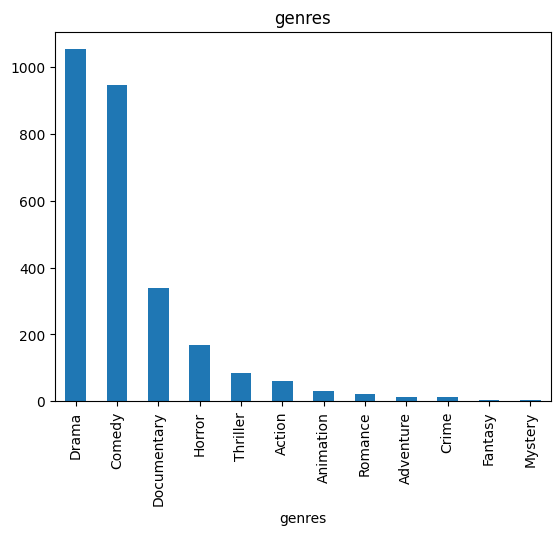

In [ ]:
# Visualisasi fitur 'genres' untuk melihat pembagian isi datasetnya
categorical_features = ['genres']
feature = categorical_features[0]
count = movies[feature].value_counts()
percent = 100*movies[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah film':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

###- Rating

In [ ]:
# Melihat jumlah userID dan jumlah data rating
print('Jumlah userID: ', len(rating.userId.unique()))
print('Jumlah data rating: ', len(rating))

Jumlah userID:  610
Jumlah data rating:  100836


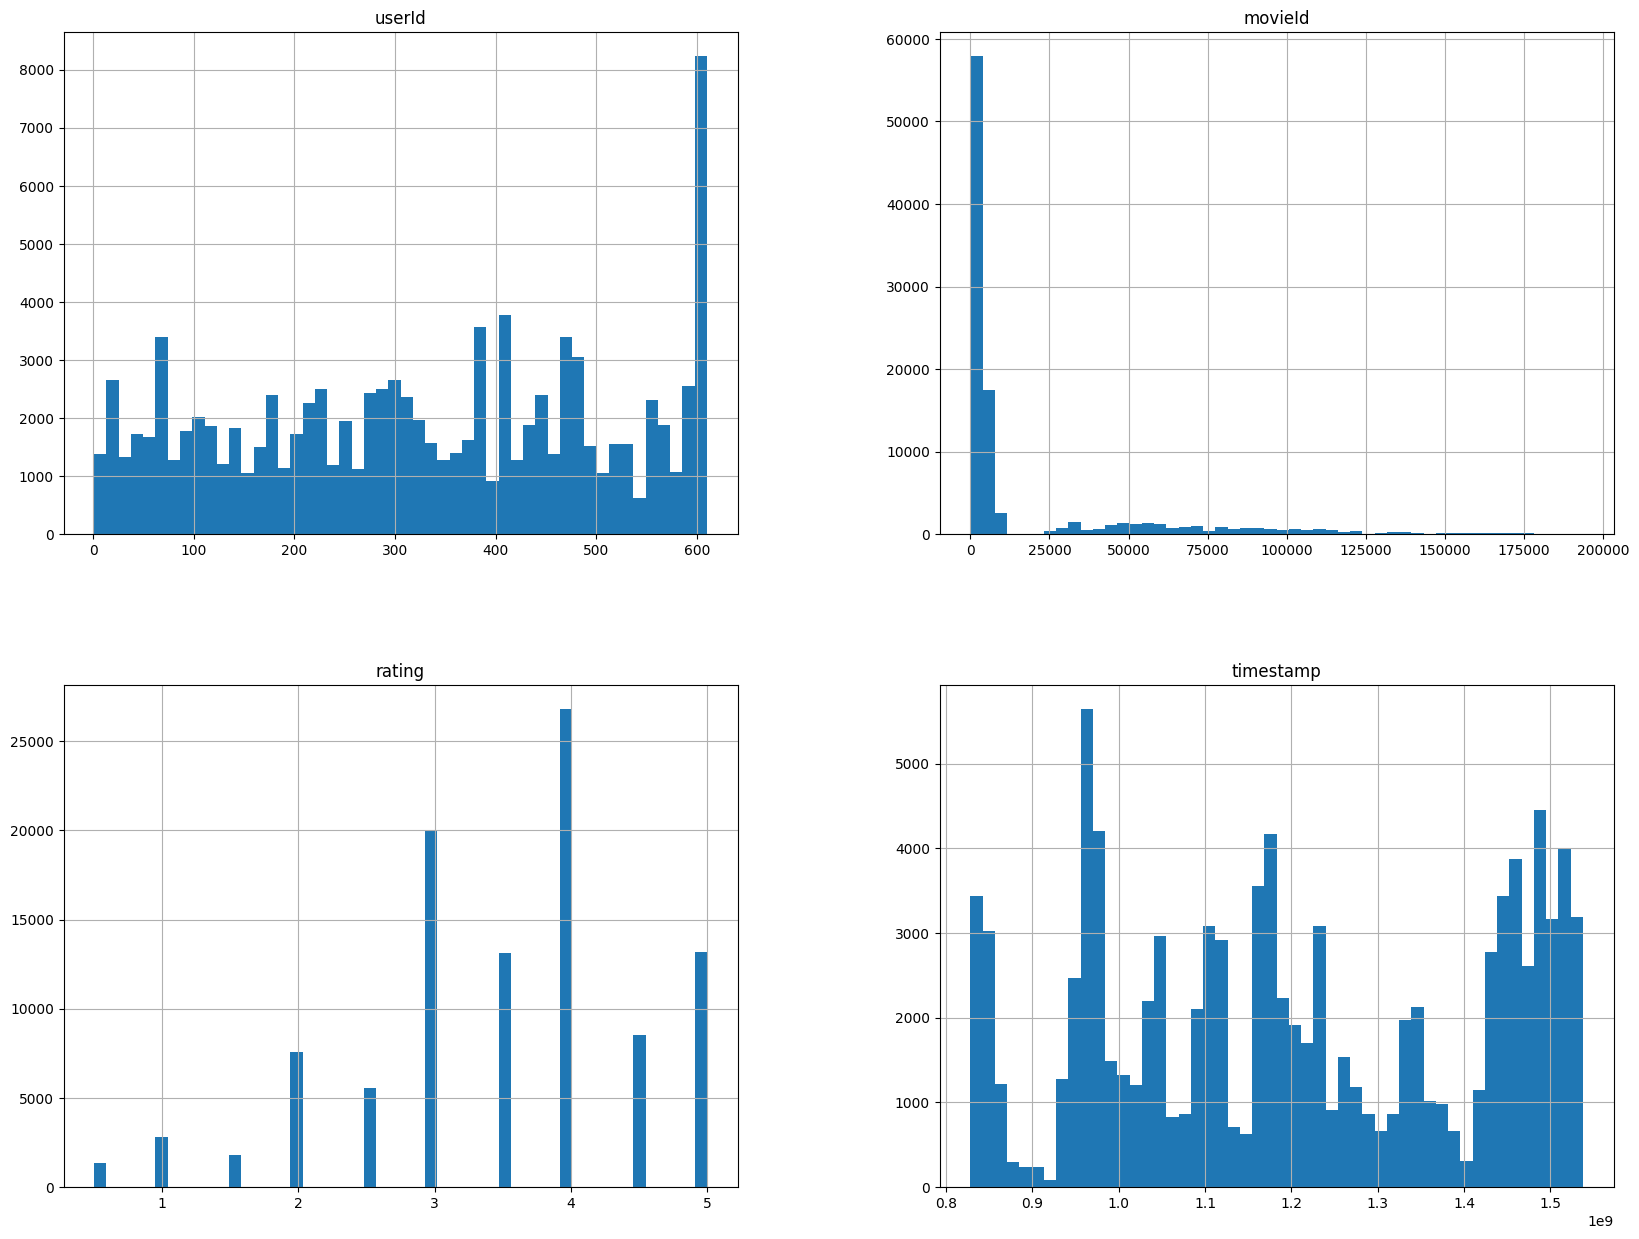

In [ ]:
# visualisasi fitur numerik yang ada di dataset rating
rating.hist(bins=50, figsize=(20,15))
plt.show()

#3. Data Preparation

Data Preparation merupakan tahap untuk mempersiapkan data sebelum masuk ke tahap pembuatan model Machine Learning.

##3.1 Menggabungkan Dataset dan Menangani Missing Value

In [ ]:
# Menggabungkan dataset movies dan rating
all_movies = pd.merge(movies, rating, on='movieId', how='left')
all_movies

,movieId,title,genres,userId,rating,timestamp
0,5,Father of the Bride Part II (1995),Comedy,6.0,5.0,8.455539e+08
1,5,Father of the Bride Part II (1995),Comedy,31.0,3.0,8.504666e+08
2,5,Father of the Bride Part II (1995),Comedy,43.0,5.0,8.489943e+08
3,5,Father of the Bride Part II (1995),Comedy,45.0,3.0,9.596251e+08
4,5,Father of the Bride Part II (1995),Comedy,58.0,4.0,8.477192e+08
...,...,...,...,...,...,...
16012,190221,Hommage à Zgougou (et salut à Sabine Mamou) (2...,Documentary,338.0,1.0,1.530148e+09
16013,193573,Love Live! The School Idol Movie (2015),Animation,184.0,4.0,1.537100e+09
16014,193579,Jon Stewart Has Left the Building (2015),Documentary,184.0,3.5,1.537107e+09
16015,193585,Flint (2017),Drama,184.0,3.5,1.537110e+09


In [ ]:
# Melihat data yang kosong
all_movies.isnull().sum()

movieId      0
title        0
genres       0
userId       6
rating       6
timestamp    6
dtype: int64

In [ ]:
# Membuang data yang kosong
all_movies_clean = all_movies.dropna()
all_movies_clean

,movieId,title,genres,userId,rating,timestamp
0,5,Father of the Bride Part II (1995),Comedy,6.0,5.0,8.455539e+08
1,5,Father of the Bride Part II (1995),Comedy,31.0,3.0,8.504666e+08
2,5,Father of the Bride Part II (1995),Comedy,43.0,5.0,8.489943e+08
3,5,Father of the Bride Part II (1995),Comedy,45.0,3.0,9.596251e+08
4,5,Father of the Bride Part II (1995),Comedy,58.0,4.0,8.477192e+08
...,...,...,...,...,...,...
16012,190221,Hommage à Zgougou (et salut à Sabine Mamou) (2...,Documentary,338.0,1.0,1.530148e+09
16013,193573,Love Live! The School Idol Movie (2015),Animation,184.0,4.0,1.537100e+09
16014,193579,Jon Stewart Has Left the Building (2015),Documentary,184.0,3.5,1.537107e+09
16015,193585,Flint (2017),Drama,184.0,3.5,1.537110e+09


In [ ]:
# Menampilkan data dan mengurutkannya berdasarkan movieId
fix_movies = all_movies_clean.sort_values('movieId', ascending=True)
fix_movies

,movieId,title,genres,userId,rating,timestamp
0,5,Father of the Bride Part II (1995),Comedy,6.0,5.0,8.455539e+08
27,5,Father of the Bride Part II (1995),Comedy,353.0,3.0,8.319399e+08
28,5,Father of the Bride Part II (1995),Comedy,389.0,4.0,8.579342e+08
29,5,Father of the Bride Part II (1995),Comedy,402.0,3.0,8.495981e+08
30,5,Father of the Bride Part II (1995),Comedy,414.0,2.0,9.614376e+08
...,...,...,...,...,...,...
16012,190221,Hommage à Zgougou (et salut à Sabine Mamou) (2...,Documentary,338.0,1.0,1.530148e+09
16013,193573,Love Live! The School Idol Movie (2015),Animation,184.0,4.0,1.537100e+09
16014,193579,Jon Stewart Has Left the Building (2015),Documentary,184.0,3.5,1.537107e+09
16015,193585,Flint (2017),Drama,184.0,3.5,1.537110e+09


In [ ]:
# Melihat berapa jumlah film dalam fix_movies
len(fix_movies.movieId.unique())

2725

In [ ]:
# Melihat genre movie setelah data dirapihkan
print('Genre: ', fix_movies.genres.unique())

Genre:  ['Comedy' 'Action' 'Drama' 'Documentary' 'Thriller' 'Horror' 'Romance'
 'Adventure' 'Crime' 'Mystery' 'Fantasy' 'Animation']


##3.2 Menghapus Data Duplikat

In [ ]:
# Menghapus data duplikat pada variabel preparation
preparation = fix_movies.drop_duplicates('movieId')
preparation

,movieId,title,genres,userId,rating,timestamp
0,5,Father of the Bride Part II (1995),Comedy,6.0,5.0,8.455539e+08
59,9,Sudden Death (1995),Action,428.0,2.0,1.111525e+09
75,14,Nixon (1995),Drama,437.0,3.0,8.597211e+08
95,18,Four Rooms (1995),Comedy,380.0,4.0,1.494279e+09
167,19,Ace Ventura: When Nature Calls (1995),Comedy,477.0,3.0,1.200940e+09
...,...,...,...,...,...,...
16012,190221,Hommage à Zgougou (et salut à Sabine Mamou) (2...,Documentary,338.0,1.0,1.530148e+09
16013,193573,Love Live! The School Idol Movie (2015),Animation,184.0,4.0,1.537100e+09
16014,193579,Jon Stewart Has Left the Building (2015),Documentary,184.0,3.5,1.537107e+09
16015,193585,Flint (2017),Drama,184.0,3.5,1.537110e+09


##3.3 Mengonversi Data Series Menjadi Bentuk List

In [ ]:
# Mengonversi data series ‘movieId’ menjadi bentuk list
movie_id = preparation['movieId'].tolist()

# Mengonversi data series ‘title’ menjadi bentuk list
movie_title = preparation['title'].tolist()

# Mengonversi data series ‘genres’ menjadi bentuk list
movie_genre = preparation['genres'].tolist()

print(len(movie_id))
print(len(movie_title))
print(len(movie_genre))

2725
2725
2725


In [ ]:
# Membuat dictionary data
movie_new = pd.DataFrame({
    'id': movie_id,
    'movie_title': movie_title,
    'genre': movie_genre
})
movie_new

,id,movie_title,genre
0,5,Father of the Bride Part II (1995),Comedy
1,9,Sudden Death (1995),Action
2,14,Nixon (1995),Drama
3,18,Four Rooms (1995),Comedy
4,19,Ace Ventura: When Nature Calls (1995),Comedy
...,...,...,...
2720,190221,Hommage à Zgougou (et salut à Sabine Mamou) (2...,Documentary
2721,193573,Love Live! The School Idol Movie (2015),Animation
2722,193579,Jon Stewart Has Left the Building (2015),Documentary
2723,193585,Flint (2017),Drama


In [ ]:
# Melihat 5 sampel movie
data = movie_new
data.sample(5)

,id,movie_title,genre
1657,30820,"Woodsman, The (2004)",Drama
1408,7158,House of Sand and Fog (2003),Drama
2706,183911,The Clapper (2018),Comedy
1763,46865,Little Man (2006),Comedy
1194,5633,Heaven (2002),Drama


#4. Model Development - Content Based Filtering

Ide dari sistem rekomendasi berbasis konten (content-based filtering) adalah merekomendasikan item yang mirip dengan item yang disukai pengguna di masa lalu.

##4.1 TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(data['genre'])

# Mapping array dari fitur index integer ke fitur nama
feature_names = tf.get_feature_names_out()

# Menampilkan nama fitur
print(feature_names)


['action' 'adventure' 'animation' 'comedy' 'crime' 'documentary' 'drama'
 'fantasy' 'horror' 'mystery' 'romance' 'thriller']


In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['genre'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(2725, 12)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan genre
# Baris diisi dengan movie title

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.movie_title
).sample(12, axis=1).sample(10, axis=0)

,romance,crime,action,fantasy,documentary,mystery,drama,horror,thriller,adventure,animation,comedy
movie_title,,,,,,,,,,,,
"Thin Line Between Love and Hate, A (1996)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Waydowntown (2000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Falling Angels (2003),0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
The Wild One (1953),0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
"War Room, The (1993)",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
National Lampoon's Vacation (1983),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Man on the Flying Trapeze (1935),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Disaster Movie (2008),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
"Last Emperor, The (1987)",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


##4.2 Cosine Similarity

In [ ]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa movie title
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['movie_title'], columns=data['movie_title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap movie title
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (2725, 2725)


movie_title,Comedy Central Roast of James Franco (2013),Twinsters (2015),Breathe (2014),Steve Jobs (2015),Four Christmases (2008)
movie_title,,,,,
Through a Glass Darkly (Såsom i en spegel) (1961),0.0,0.0,1.0,1.0,0.0
Nowitzki: The Perfect Shot (2014),0.0,1.0,0.0,0.0,0.0
Wiener-Dog (2016),1.0,0.0,0.0,0.0,1.0
"Man Who Came to Dinner, The (1942)",1.0,0.0,0.0,0.0,1.0
"Awfully Big Adventure, An (1995)",0.0,0.0,1.0,1.0,0.0
"Class, The (Klass) (2007)",0.0,0.0,1.0,1.0,0.0
La vérité si je mens ! (1997),1.0,0.0,0.0,0.0,1.0
"Magdalene Sisters, The (2002)",0.0,0.0,1.0,1.0,0.0
We Could Be King (2014),0.0,1.0,0.0,0.0,0.0


##4.3 Membuat Fungsi movie_recommendation()

In [ ]:
def movie_recommendations(movie_title, similarity_data=cosine_sim_df, items=data[['movie_title', 'genre']], k=10):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,movie_title].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Membuang movie_title agar nama film yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(movie_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

##4.4. Result

In [ ]:
# Melihat genre film yang akan diuji
movie_title = 'Piper (2016)'
data[data.movie_title.eq(movie_title)]

,id,movie_title,genre
2565,160718,Piper (2016),Animation


In [ ]:
# Menampilkan hasil rekomendasi judul film berdasarkan genre
movie_title = 'Piper (2016)'
movie_recommendations = movie_recommendations(movie_title)
movie_recommendations

,movie_title,genre
0,A Plasticine Crow (1981),Animation
1,The Red Turtle (2016),Animation
2,The Monkey King (1964),Animation
3,Winter in Prostokvashino (1984),Animation
4,Vacations in Prostokvashino (1980),Animation
5,Garfield's Pet Force (2009),Animation
6,Nasu: Summer in Andalusia (2003),Animation
7,Three from Prostokvashino (1978),Animation
8,Investigation Held by Kolobki (1986),Animation
9,"Fireworks, Should We See It from the Side or t...",Animation


#5. Evaluation

Metrik yang cocok dipakai untuk kasus content based filtering adalah Precision.


Precision = Total jumlah item yang direkomendasikan/Jumlah item relevan yang direkomendasikan

Berdasarkan hasil di atas dapat disimpulkan bahwa dari 10 judul film yang direkomendasikan, ada 10 item yang relevan, oleh karena itu Precision dari model tersebut adalah 10/10 atau 100%